In [5]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [6]:
# importing the dataset
df = pd.read_csv('baseball.csv')
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
# first ten elements of the dataset
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# checking the data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#Statistical description of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [8]:
#Checking the shape of the data
df.shape

(30, 17)

In [9]:
#Checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### Now we will explore the various features to se how they relate to the target 

<AxesSubplot:title={'center':'Distribution of Wins'}, xlabel='W', ylabel='Density'>

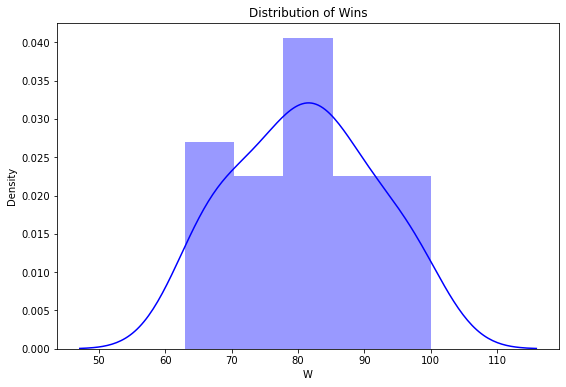

In [10]:
# we will look at the target first
plt.figure(figsize = (9,6))
plt.title('Distribution of Wins')
sns.distplot(df['W'], color = 'b')

Wre can notice most of the wins between 65 and 100

<AxesSubplot:xlabel='W', ylabel='R'>

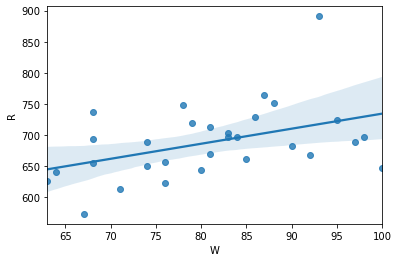

In [13]:
# let's examine the relationship between Wins and Runs
sns.regplot(x='W', y='R', data=df)

<AxesSubplot:xlabel='W', ylabel='R'>

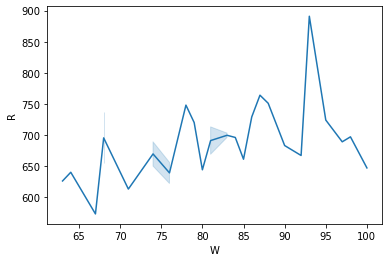

In [17]:
sns.lineplot(x='W', y='R', data=df)

There is a positive correlation between runs and wins, this implies more runs will lead to more wins

<AxesSubplot:xlabel='W', ylabel='AB'>

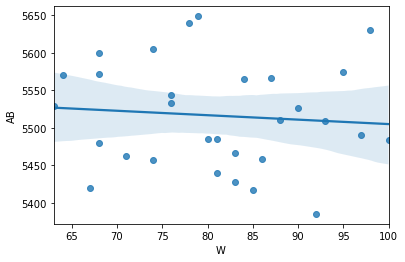

In [20]:
# let's examine the relationship between Wins and At Bats
sns.regplot(x='W', y='AB', data=df)

<AxesSubplot:xlabel='W', ylabel='AB'>

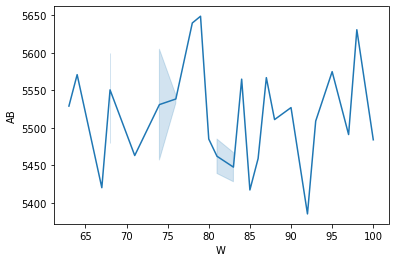

In [21]:
sns.lineplot(x='W', y='AB', data=df)

There is a slightly negative correlation between At Bats and wins, this implies more At Bats will reduce the chances of wins

<AxesSubplot:xlabel='W', ylabel='H'>

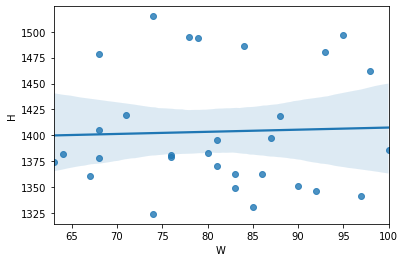

In [22]:
# let's examine the relationship between Wins and Hits
sns.regplot(x='W', y='H', data=df)

<AxesSubplot:xlabel='W', ylabel='H'>

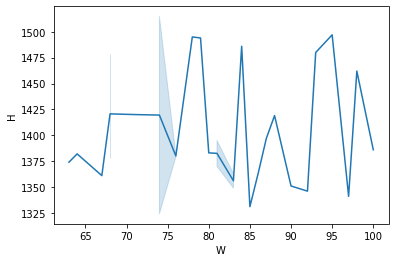

In [23]:
sns.lineplot(x='W', y='H', data=df)

 We notice a slightly positive correlation between Hits and Wins, which implies the number of hits will affect wins positively to a small degree

<AxesSubplot:xlabel='W', ylabel='2B'>

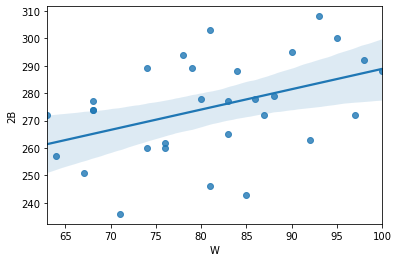

In [24]:
# let's examine the relationship between Wins and Doubles
sns.regplot(x='W', y='2B', data=df)

<AxesSubplot:xlabel='W', ylabel='2B'>

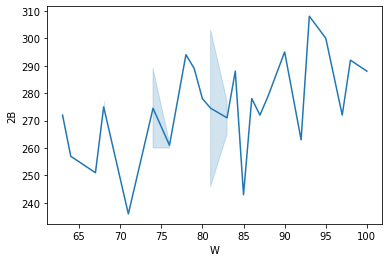

In [25]:
sns.lineplot(x='W', y='2B', data=df)

<AxesSubplot:xlabel='W', ylabel='3B'>

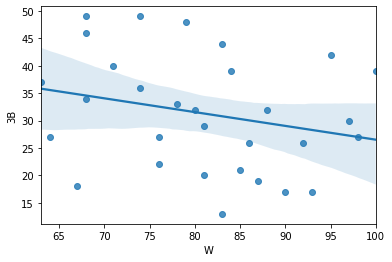

In [26]:
# let's examine the relationship between Wins and Triples
sns.regplot(x='W', y='3B', data=df)

<AxesSubplot:xlabel='W', ylabel='3B'>

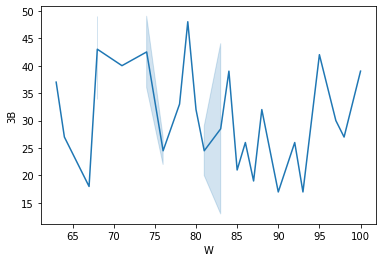

In [27]:
sns.lineplot(x='W', y='3B', data=df)

<AxesSubplot:xlabel='W', ylabel='HR'>

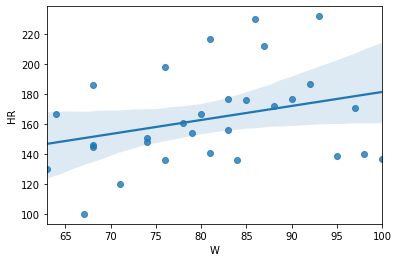

In [28]:
# let's examine the relationship between Wins and Home Runs
sns.regplot(x='W', y='HR', data=df)

<AxesSubplot:xlabel='W', ylabel='HR'>

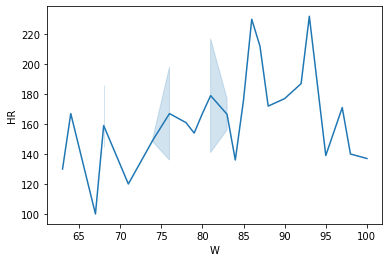

In [29]:
sns.lineplot(x='W', y='HR', data=df)

<AxesSubplot:xlabel='W', ylabel='BB'>

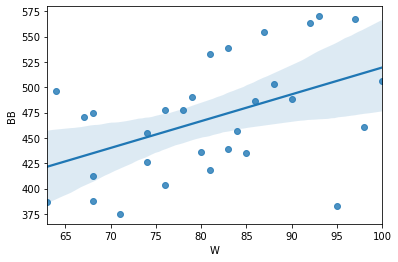

In [30]:
# let's examine the relationship between Wins and Walks
sns.regplot(x='W', y='BB', data=df)

<AxesSubplot:xlabel='W', ylabel='BB'>

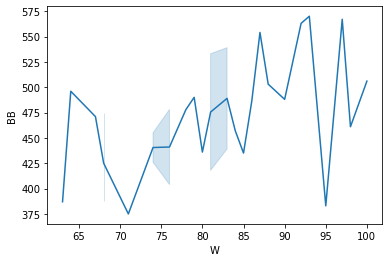

In [31]:
sns.lineplot(x='W', y='BB', data=df)

<AxesSubplot:xlabel='W', ylabel='SO'>

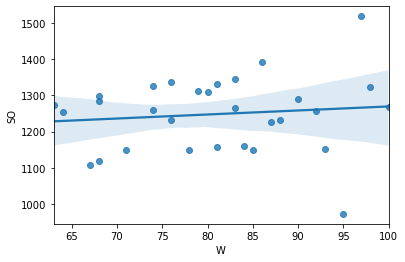

In [32]:
# let's examine the relationship between Wins and Strike Outs
sns.regplot(x='W', y='SO', data=df)

<AxesSubplot:xlabel='W', ylabel='SO'>

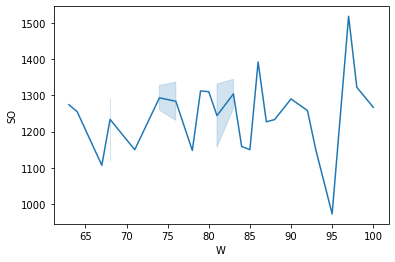

In [33]:
sns.lineplot(x='W', y='SO', data=df)

<AxesSubplot:xlabel='W', ylabel='SB'>

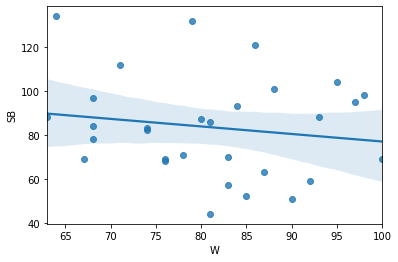

In [34]:
# let's examine the relationship between Wins and Stolen Bases
sns.regplot(x='W', y='SB', data=df)

<AxesSubplot:xlabel='W', ylabel='SB'>

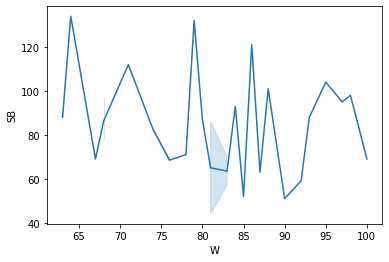

In [35]:
sns.lineplot(x='W', y='SB', data=df)

<AxesSubplot:xlabel='W', ylabel='RA'>

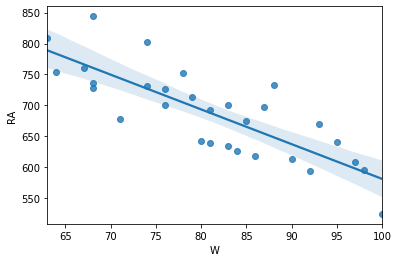

In [36]:
# let's examine the relationship between Wins and Runs Allowed
sns.regplot(x='W', y='RA', data=df)

<AxesSubplot:xlabel='W', ylabel='RA'>

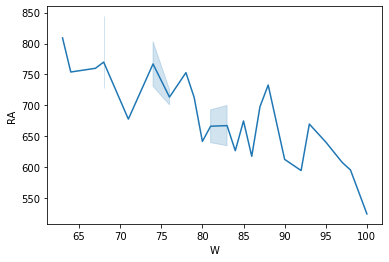

In [37]:
sns.lineplot(x='W', y='RA', data=df)

We can see a strong negative correlation between Runs Allowed and Wins. As the number of Runs Allowed increases, the number of wins decreases. This implies Runs allowed influences Wins negatively

<AxesSubplot:xlabel='W', ylabel='ER'>

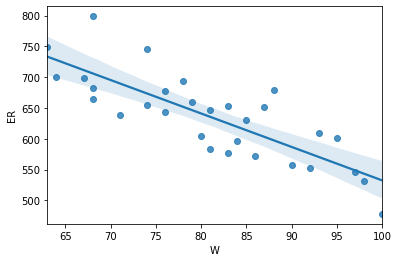

In [43]:
# let's examine the relationship between Wins and Earned Runs
sns.regplot(x='W', y='ER', data=df)

<AxesSubplot:xlabel='W', ylabel='ER'>

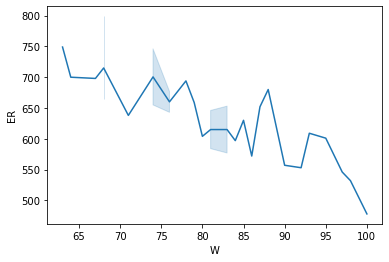

In [44]:
sns.lineplot(x='W', y='ER', data=df)

We can see a strong negative correlation between Earned Runs and Wins. As the number of Earned Runs increases, the number of wins decreases. This implies Earned Runs influences Wins negatively

<AxesSubplot:xlabel='W', ylabel='ERA'>

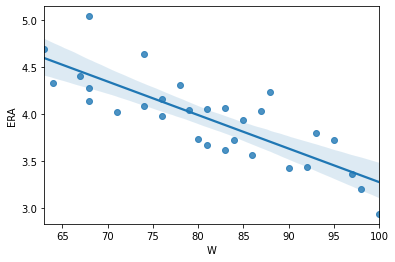

In [47]:
# let's examine the relationship between Wins and Earned Runs Average
sns.regplot(x='W', y='ERA', data=df)

<AxesSubplot:xlabel='W', ylabel='ERA'>

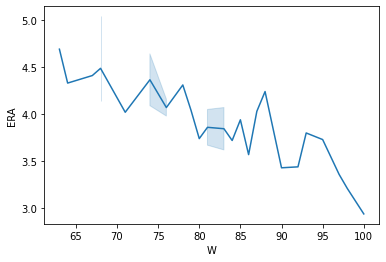

In [48]:
sns.lineplot(x='W', y='ERA', data=df)

We can see a strong negative correlation between Earned Runs and Wins. As the number of Earned Runs increases, the number of wins decreases. This implies Earned Runs influences Wins negatively

<AxesSubplot:xlabel='W', ylabel='CG'>

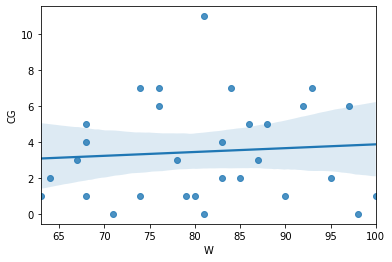

In [49]:
# let's examine the relationship between Wins and Complete Games
sns.regplot(x='W', y='CG', data=df)

<AxesSubplot:xlabel='W', ylabel='CG'>

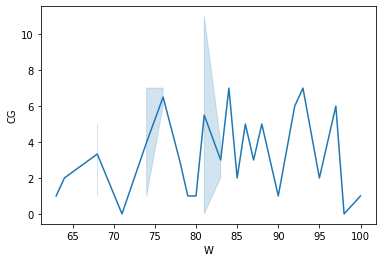

In [50]:
sns.lineplot(x='W', y='CG', data=df)

There amount of Complete Games has a little effect on wins, the reglpot shows a slightly positive correlation between wins and Complete Games. We also notice some teams very less Complete Games but a lot of wins
we can say Complete Games will not influence wins so much

<AxesSubplot:xlabel='W', ylabel='SHO'>

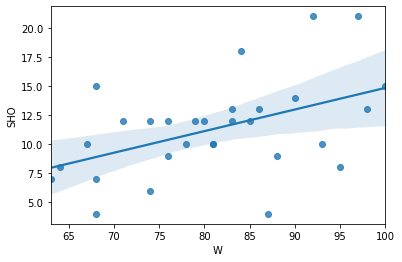

In [51]:
# let's examine the relationship between Wins and Shout Outs
sns.regplot(x='W', y='SHO', data=df)

<AxesSubplot:xlabel='W', ylabel='SHO'>

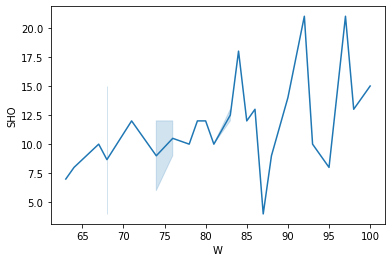

In [52]:
sns.lineplot(x='W', y='SHO', data=df)

We can see a strong positive correlation between Shout Outs and Wins, telling us that  Shout Outs can increase the amount of wins a team gets greatly. However, we can still see some good amount of wins with very little Shout Outs

<AxesSubplot:xlabel='W', ylabel='SV'>

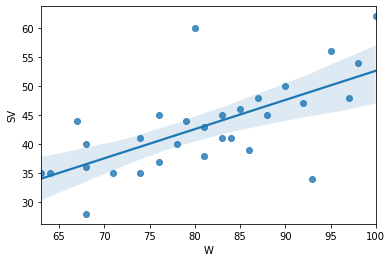

In [53]:
# let's examine the relationship between Wins and Saves
sns.regplot(x='W', y='SV', data=df)

<AxesSubplot:xlabel='W', ylabel='SV'>

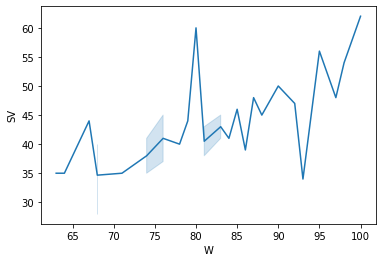

In [54]:
sns.lineplot(x='W', y='SV', data=df)

We can see a strong positive correlation between Saves and Wins, telling us that  Saves can increase the amount of wins a team gets greatly. However, we can still see some good amount of wins with very little Saves

<AxesSubplot:xlabel='W', ylabel='E'>

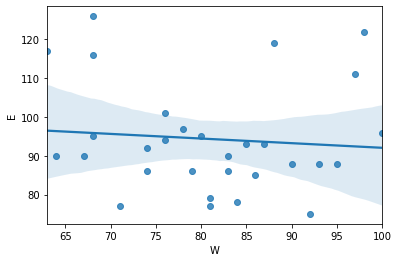

In [45]:
# let's examine the relationship between Wins and Errors
sns.regplot(x='W', y='E', data=df)

<AxesSubplot:xlabel='W', ylabel='E'>

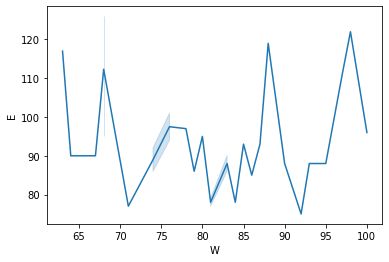

In [46]:
sns.lineplot(x='W', y='E', data=df)

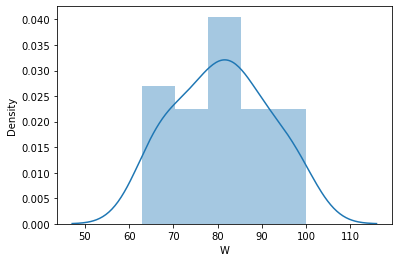

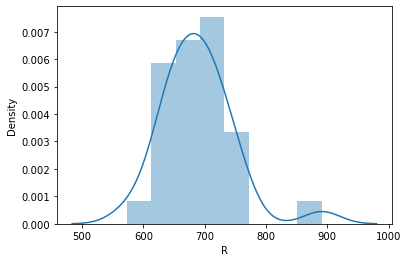

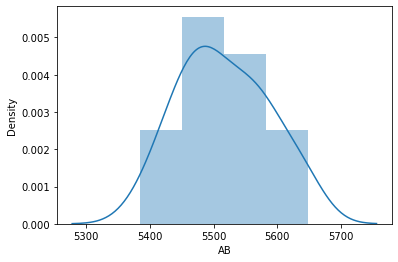

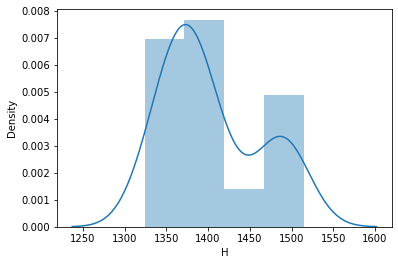

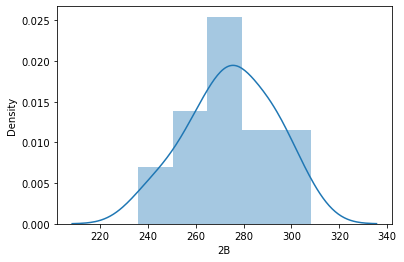

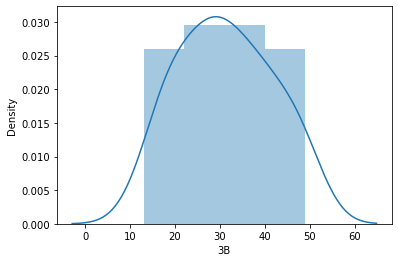

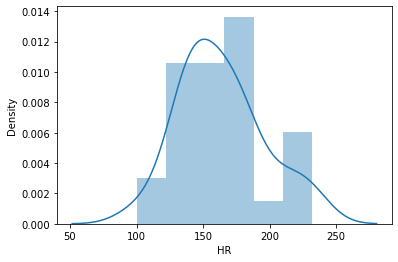

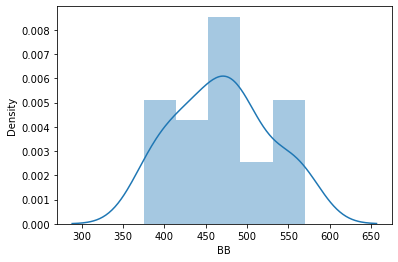

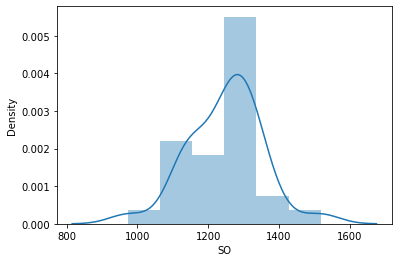

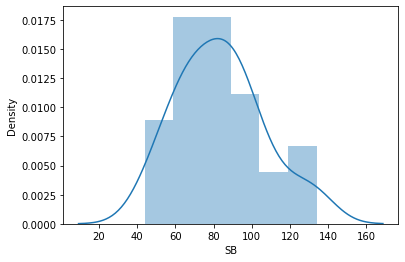

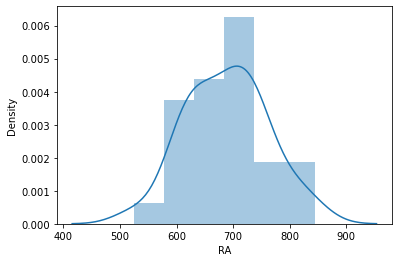

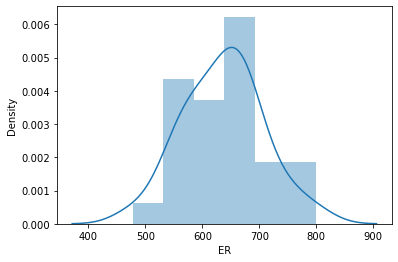

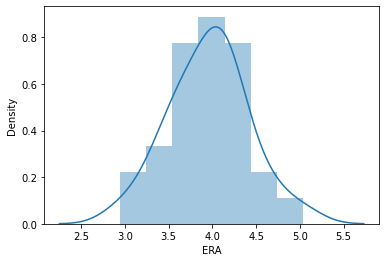

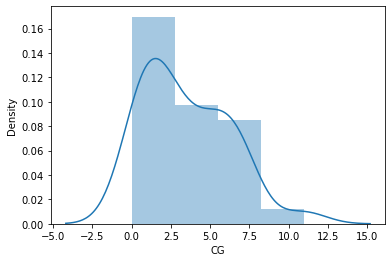

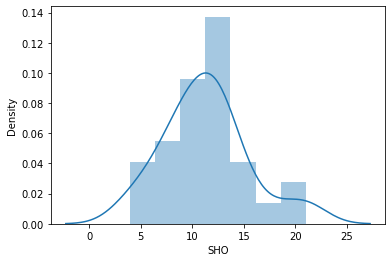

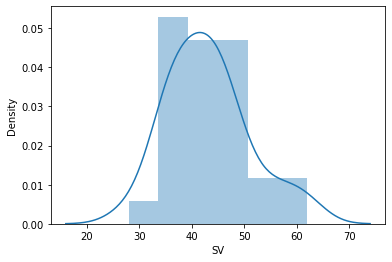

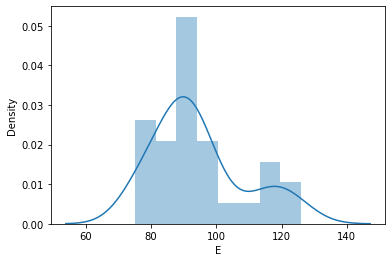

In [55]:
# Now lets check the distribution of the various features
for i in df.columns:
    plt.figure(i)
    sns.distplot(df[i],kde=True)

In [82]:
# Now let's check for skewness
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

We can see that there is no skewness in the data except for the Runs column which is a little right skewed. We will do some scaling to try fix that beefore training

In [63]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

W: Number of unique values 24
________________________________________________
R: Number of unique values 28
________________________________________________
AB: Number of unique values 29
________________________________________________
H: Number of unique values 29
________________________________________________
2B: Number of unique values 22
________________________________________________
3B: Number of unique values 23
________________________________________________
HR: Number of unique values 27
________________________________________________
BB: Number of unique values 29
________________________________________________
SO: Number of unique values 29
________________________________________________
SB: Number of unique values 27
________________________________________________
RA: Number of unique values 30
________________________________________________
ER: Number of unique values 30
________________________________________________
ERA: Number of unique values 30
___________

In [7]:
# separating features
x = df.drop('W', axis=1)
y = df['W']

In [84]:
# Now we will split the data into testing and training sets
lr = LinearRegression()
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is: 0.9740342087681646
At random state 0, the testing accuracy is: 0.39888593312783593


At random state 1, the training accuracy is: 0.980278042821776
At random state 1, the testing accuracy is: 0.31461749363342906


At random state 2, the training accuracy is: 0.9945593908141704
At random state 2, the testing accuracy is: -2.1905436325156122


At random state 3, the training accuracy is: 0.9760342041610788
At random state 3, the testing accuracy is: 0.60788396015456


At random state 4, the training accuracy is: 0.9653607276925376
At random state 4, the testing accuracy is: 0.6694899060031596


At random state 5, the training accuracy is: 0.9542874439438674
At random state 5, the testing accuracy is: 0.7639635508871769


At random state 6, the training accuracy is: 0.9548034139459606
At random state 6, the testing accuracy is: 0.7045610801845427


At random state 7, the training accuracy is: 0.9686347809215797
At random state 7, the testing ac

At random state 63, the training accuracy is: 0.9614105276248298
At random state 63, the testing accuracy is: 0.4885712974639621


At random state 64, the training accuracy is: 0.9606278753237357
At random state 64, the testing accuracy is: 0.5911292218069133


At random state 65, the training accuracy is: 0.9499093883136953
At random state 65, the testing accuracy is: 0.8259641259647679


At random state 66, the training accuracy is: 0.9894825335563614
At random state 66, the testing accuracy is: 0.5198518583424245


At random state 67, the training accuracy is: 0.9462666069247798
At random state 67, the testing accuracy is: 0.8020716341824302


At random state 68, the training accuracy is: 0.9769746037885538
At random state 68, the testing accuracy is: -0.15813736408204537


At random state 69, the training accuracy is: 0.9863733271516846
At random state 69, the testing accuracy is: 0.7265581779863344


At random state 70, the training accuracy is: 0.9763031132473672
At random state 

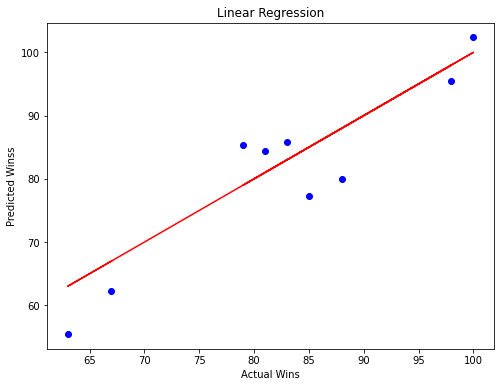

In [85]:
pred_test = lr.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test, color='r')
plt.title('Linear Regression')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Winss')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=34)

In [9]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,-0.605323,0.219679,-0.631047,-0.897840,-0.844357,1.063407,0.145141,1.086530,-0.696037,0.540814,0.627066,0.473773,0.983993,0.141632,0.438735,-0.088314
1,-0.187274,-0.013037,-1.121862,1.052640,-1.301354,0.445538,0.324433,0.611173,-1.544754,-1.264181,-1.388502,-1.422557,-1.082392,0.682410,1.181755,-0.485730
2,-0.435006,-1.956906,-1.209507,-0.838735,-0.478759,0.739761,1.669122,0.280490,-1.167546,-1.551703,-1.455688,-1.396580,0.983993,2.575131,0.735943,-1.346795
3,-1.890435,-1.477784,-0.946571,-1.548000,-1.209954,-1.819981,0.019637,-1.279921,-0.696037,1.083910,0.979790,1.123202,-0.255838,-0.399145,0.290131,-0.353258
4,0.029492,1.410641,0.823867,0.875324,-0.387359,-0.643088,-0.159655,0.941856,0.671339,-1.535729,-1.808412,-1.994054,-1.495669,0.412021,1.776171,1.766289


In [10]:
# now lets check for skewness again
x_train.skew().sort_values()

SO    -0.773901
2B    -0.446444
AB    -0.105854
ERA   -0.086674
ER    -0.023529
3B     0.038949
CG     0.049590
BB     0.057099
RA     0.090972
SV     0.140094
H      0.487944
SHO    0.541582
HR     0.586922
SB     0.591985
E      0.827228
R      0.954287
dtype: float64

In [11]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

   feature          VIF
0        R    28.534643
1       AB    23.380108
2        H    12.279844
3       2B    10.708946
4       3B     6.767065
5       HR    12.730130
6       BB    10.538798
7       SO     3.749959
8       SB     2.994649
9       RA   296.830586
10      ER  3019.947515
11     ERA  1960.252457
12      CG     3.770315
13     SHO     8.897038
14      SV    12.047488
15       E     3.460613


In [90]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Linear Regression Algorithm to the Training Set
    from sklearn.linear_model import LinearRegression
    log = LinearRegression()
    log.fit(x_train, y_train)

    #Using AdaBoostRegressor 
    from sklearn.ensemble import AdaBoostRegressor
    adb = AdaBoostRegressor()
    adb.fit(x_train, y_train)

    #Using KNNieghborsRegressor Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)

    # Gradient Boost Regressor
    from sklearn.ensemble import GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train, y_train)

    # Using Gaussian Regressor method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.gaussian_process import GaussianProcessRegressor
    gauss = GaussianProcessRegressor()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeRegressor of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Linear Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]AdaBoost Regressor Training Accuracy:', adb.score(x_train, y_train))
    print('[2]KNieghborsRegressor Training Accuracy:', knr.score(x_train, y_train))
    print('[3]Gradient Boosting Regressor Training Accuracy:', gbr.score(x_train, y_train))
    print('[4]Gaussian Regressor Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Regressor Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Regressor Training Accuracy:', forest.score(x_train, y_train))

    return log, adb, knr, gbr, gauss, tree, forest

In [91]:
model = models(x_train,y_train)

[0]Linear Regression Training Accuracy: 0.9682241722320032
[1]AdaBoost Regressor Training Accuracy: 0.9938646836951952
[2]KNieghborsRegressor Training Accuracy: 0.6252705241405225
[3]Gradient Boosting Regressor Training Accuracy: 0.9999999311198488
[4]Gaussian Regressor Training Accuracy: 1.0
[5]Decision Tree Regressor Training Accuracy: 1.0
[6]Random Forest Regressor Training Accuracy: 0.9151300464963367


In [92]:
for i in range(len(model)):
    cm = model[i].score(x_test,y_test)
    
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, cm))
    print()

Model[0] Testing Accuracy = "0.8603360666735145 !"

Model[1] Testing Accuracy = "0.48113929222351204 !"

Model[2] Testing Accuracy = "0.562341254382548 !"

Model[3] Testing Accuracy = "0.27552701920535794 !"

Model[4] Testing Accuracy = "-50.663968546327254 !"

Model[5] Testing Accuracy = "0.04548110634982472 !"

Model[6] Testing Accuracy = "0.43053034670821955 !"



In [93]:
# Regularization Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mae', 'poisson'],
             'n_estimators':list(range(10,100)),
             'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 19}


In [94]:
rfr = RandomForestRegressor(criterion='mae',max_features='log2', n_estimators=19)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_dec = rfr.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rfr,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

41.224086449901634
-24.666150820892298


In [12]:
# Regularization Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False],
             'normalize':[True,False],
             'n_jobs':[1,-1]}
lr = LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [13]:
lr = LinearRegression(fit_intercept:=True, n_jobs=1, normalize=False)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = r2_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

86.03360666735145
4.075540667465809


In [97]:
# Regularization Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
parameters = {'loss':['linear','exponential','square'],
             'n_estimators':list(range(10,100)),
             'random_state':list(range(0,10))}
abr = AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'exponential', 'n_estimators': 22, 'random_state': 6}


In [98]:
abr = AdaBoostRegressor(loss='exponential',random_state=6,n_estimators=22)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
pred_dec = abr.predict(x_test)

absc = r2_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(abr,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

47.64732664589014
-133.40356995815355


In [99]:
# Regularization Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators':list(range(10,100)),
             'criterion':['squared_error','mse', 'friedman_mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'n_estimators': 10}


In [100]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', n_estimators=10)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = gbr.predict(x_test)

gbsc = r2_score(y_test, pred_dec)
print(absc*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbc = gbscore.mean()
print(gbc*100)

47.64732664589014
-78.8652814548024


In [101]:
# Regularization Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['squared_error','poisson', 'friedman_mse','absolute_error']}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'min_samples_split': 9, 'splitter': 'random'}


In [102]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=9, splitter='random')
dtr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = dtr.predict(x_test)

dtsc = r2_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dtr,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

68.364695547093
-90.41621276200858


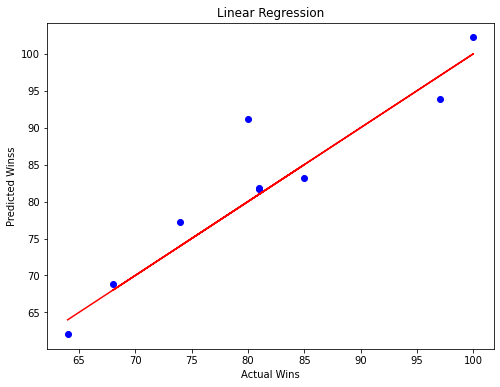

In [103]:
pred_test = lr.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test, color='r')
plt.title('Linear Regression')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Winss')
plt.show()

From the performance we can see that the Linear Regression performed best, we will save it for production

In [2]:
# saving the best model
import pickle
pickle.dump(lr, open('baseball.pkl','wb'))

NameError: name 'lr' is not defined